# Neural Networks with Pure Python / Tutorials

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Lecture 1, Homework

See https://machine-learning-for-physicists.org and the current course website linked there!

This notebook shows how to:
- visualize how the result of a NN changes when cutting away the higher layers

### Imports: only numpy and matplotlib

In [1]:
#from numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, linspace
import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

## For fun: a network with MANY hidden layers

### Functions

In [86]:
def apply_layer(y_in,w,b): # a function that applies a layer    
    """
    Go from one layer to the next, given a 
    weight matrix w (shape [n_neurons_in,n_neurons_out])
    a bias vector b (length n_neurons_out)
    and the values of input neurons y_in (shape [batchsize,n_neurons_in])
    
    returns the values of the output neurons (shape [batchsize, n_neurons_out])
    """
    z=np.dot(y_in,w)+b # batch processing: y_in is of shape [batchsize,num_neurons_in]
    return(1/(1+np.exp(-z))) # output is of shape [batchsize,num_neurons_out]

def apply_multi_net(y_in):
    """
    Apply a whole network of multiple layers
    """
    global Weights, Biases, WeightsFinal, BiasesFinal, WeightsFirst, BiasesFirst, Nlayers
    
    # MODIFIED HERE FOR VISUALIZATION:
    global y_stored # for storing intermediate results
    
    y=apply_layer(y_in,WeightsFirst,BiasesFirst)

    # MODIFIED HERE FOR VISUALIZATION:
    y_stored[0,:]=apply_layer(y,WeightsFinal,BiasesFinal)[:,0] # storing output value when final layer is evaluated right here

    for j in range(Nlayers):
        y=apply_layer(y,Weights[j,:,:],Biases[j,:])

        # MODIFIED HERE FOR VISUALIZATION:
        y_stored[j,:]=apply_layer(y,WeightsFinal,BiasesFinal)[:,0] # storing output value when final layer is evaluated right here 

    output=apply_layer(y,WeightsFinal,BiasesFinal)
    return(output)

# initialize random weights and biases

def init_random_network(num_layers=20,layer_size=100):
    """
    Initialize a random network
    num_layers counts only hidden layers
    layer_size is number of neurons in hidden layer
    Input layer is of size 2
    Output of size 1
    """
    global Weights, Biases, WeightsFinal, BiasesFinal
    global Nlayers, LayerSize
    
    Nlayers=num_layers
    LayerSize=layer_size
    
    Weights=np.random.uniform(low=-3,high=3,size=[Nlayers,LayerSize,LayerSize])
    Biases=np.random.uniform(low=-1,high=1,size=[Nlayers,LayerSize])

    # for the first hidden layer (coming in from the input layer)
    WeightsFirst=np.random.uniform(low=-1,high=1,size=[2,LayerSize])
    BiasesFirst=np.random.uniform(low=-1,high=1,size=LayerSize)

    # for the final layer (i.e. the output neuron)
    WeightsFinal=np.random.uniform(low=-1,high=1,size=[LayerSize,1])
    BiasesFinal=np.random.uniform(low=-1,high=1,size=1)

### Try it!

In [87]:
# Initialize network

init_random_network(num_layers=20,layer_size=100)

# Generate a MxM 'mesh grid', i.e. x,y values in an image
# as input to the network

M=40
v0,v1=np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=np.zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() # fill second component

# MODIFIED HERE FOR VISUALIZATION:
# prepare array to hold results for intermediate
# layers

y_stored=np.zeros([Nlayers+1,batchsize])

In [88]:
# use the MxM input grid that we generated above 
y_out=apply_multi_net(y_in) # apply net to all these samples!

In [89]:
y_2D=np.reshape(y_out[:,0],[M,M]) # back to 2D image

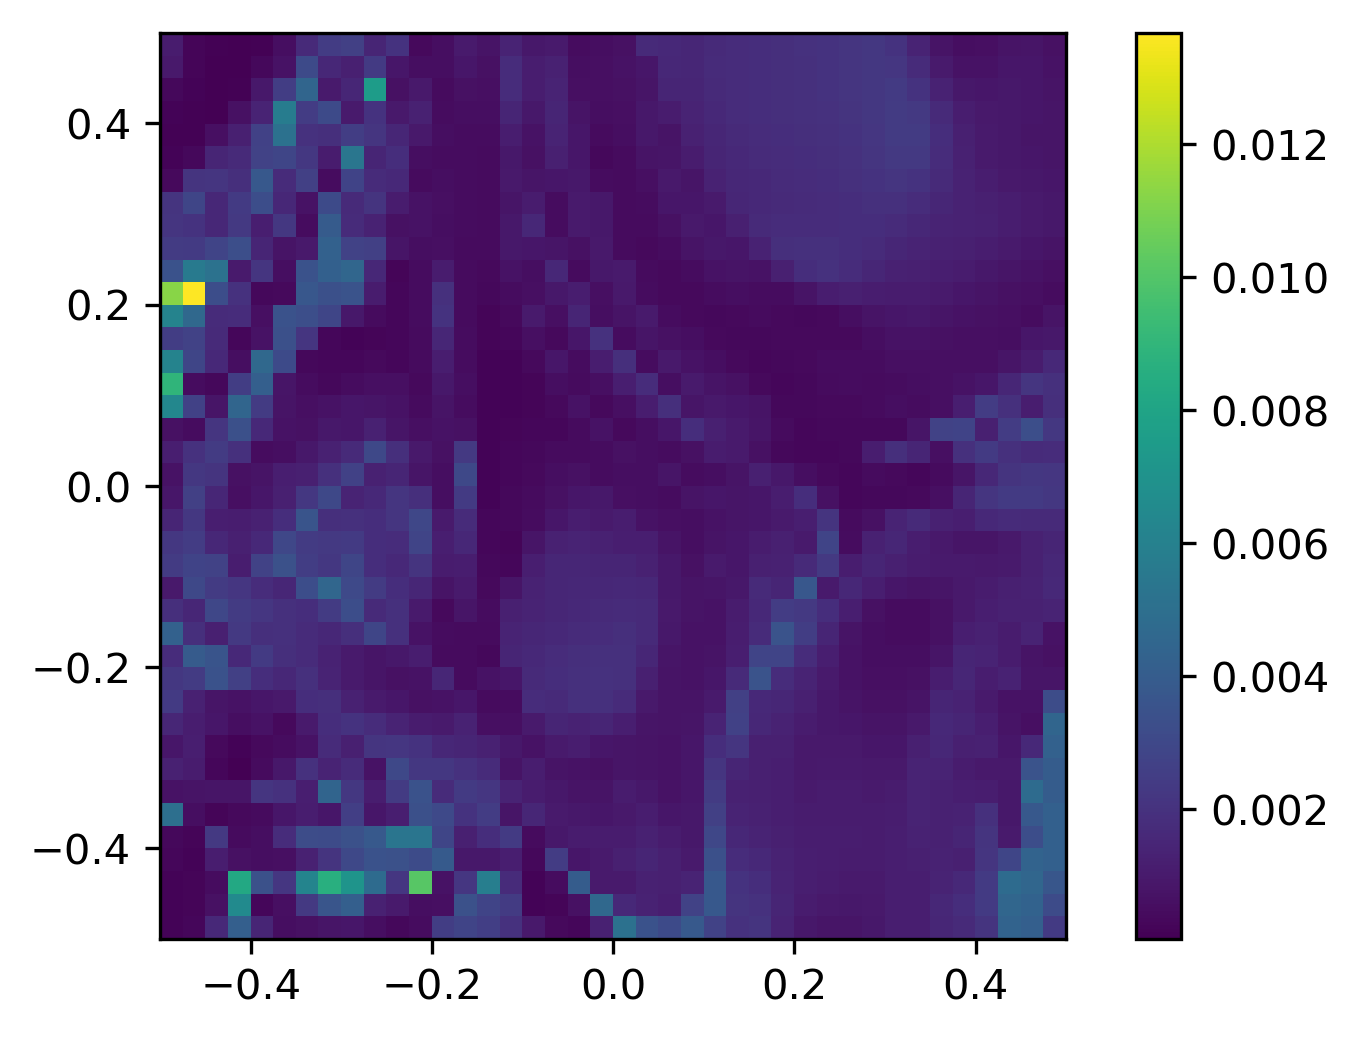

In [91]:
# Plot output of network as a function of 2D input values
plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.colorbar()
plt.show()

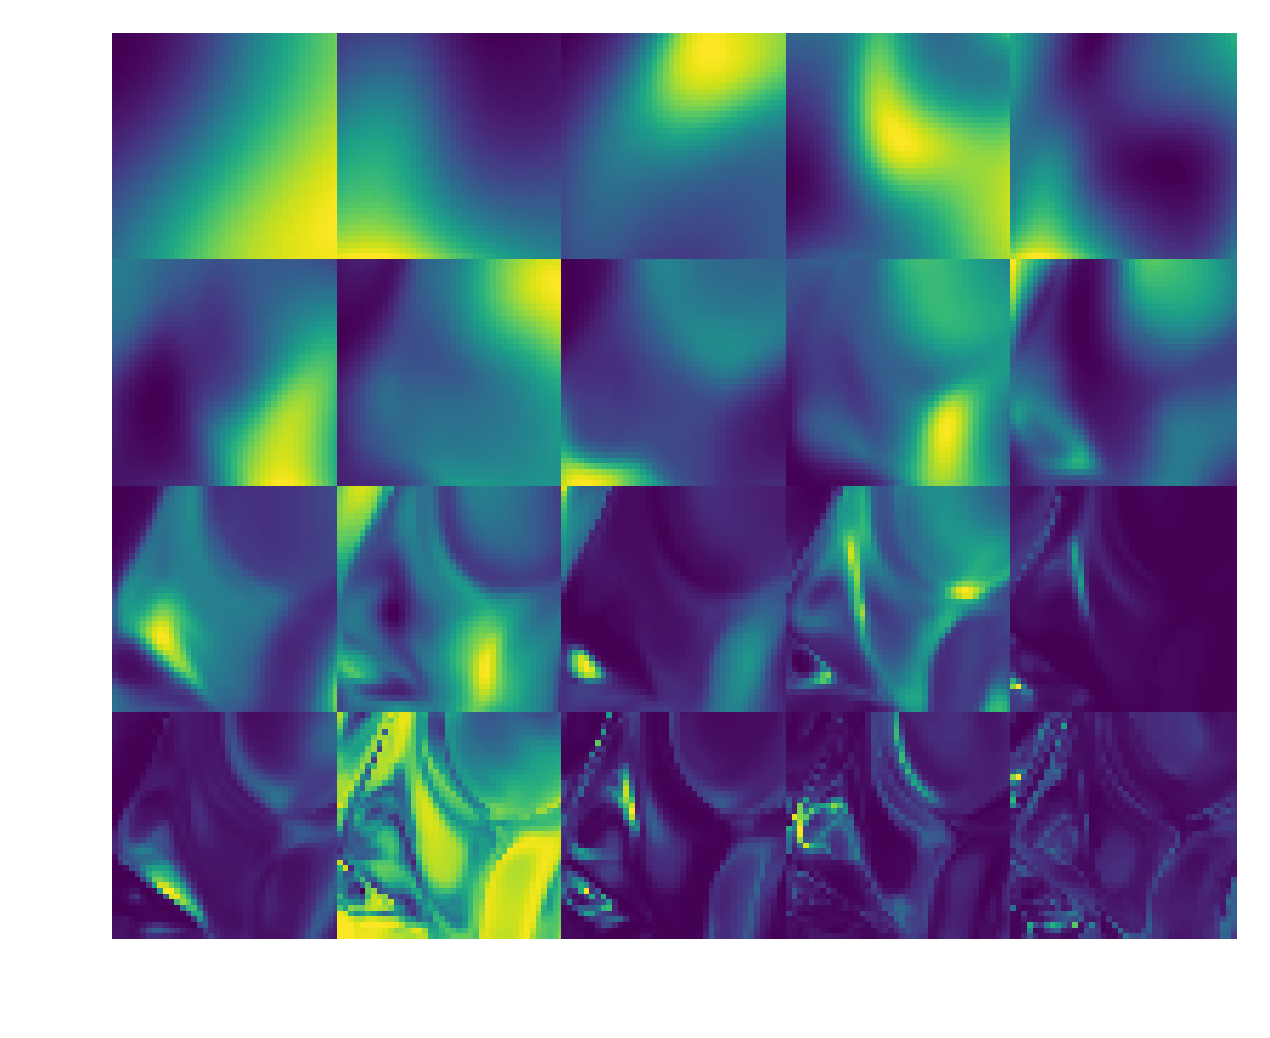

In [92]:
# MODIFIED HERE FOR VISUALIZATION:
# plot all the intermediate results
# lay them out nicely in a grid of images
ncols=5
nrows=4
fig,ax=plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols,nrows))
for j in range(ncols*nrows):
    # actually drawing the image:
    ax[int(j/ncols),j%ncols].imshow(np.reshape(y_stored[j,],[M,M]),origin='lower')
    ax[int(j/ncols),j%ncols].axis('off')
plt.subplots_adjust(wspace=-0.15,hspace=0)
plt.show()